# Bloque 1 - clasificando datos

## construyendo un segundo modelo modeloRandomTree()

Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('prestacar.csv')

In [4]:
X = df.drop(columns='moroso',axis=1)
y = df.moroso

In [5]:
modeloRandomTree = RandomForestClassifier()
modeloRandomTree.fit(X,y)
modeloRandomTree.score(X,y)

1.0

In [6]:
print(f'La exactitud del modelo es: {modeloRandomTree.score(X,y)}')

La exactitud del modelo es: 1.0


In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [17]:
modeloRandomTree = RandomForestClassifier()
modeloRandomTree.fit(X_train,y_train)
print(f'La exactitud del modelo en entrenamiento es: {modeloRandomTree.score(X_train,y_train)}')
print(f'La exactitud del modelo en validacion es: {modeloRandomTree.score(X_val,y_val)}')

La exactitud del modelo en entrenamiento es: 0.9999316799890688
La exactitud del modelo en validacion es: 0.9157614265218282


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_previsto = modeloRandomTree.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[8890   16]
 [ 806   46]]


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

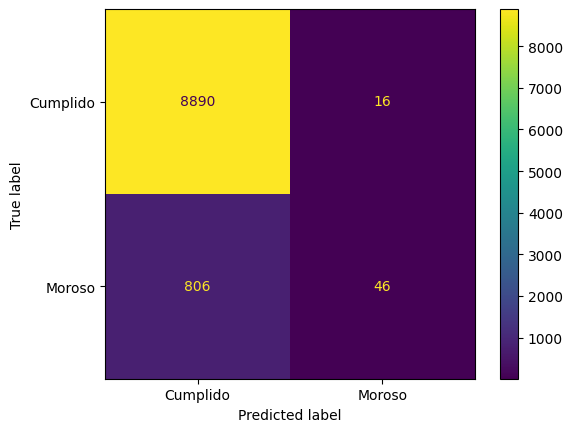

In [23]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

## DecisionTreeClassifier

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

## como comparar

- **TN (True Negative)**: Negativos bien clasificados.

- **FP (False Positive)**: Negativos mal clasificados como positivos.

- **FN (False Negative)**: Positivos mal clasificados como negativos.

- **TP (True Positive)**: Positivos bien clasificados.

Ok, vamos a compararlos paso a paso.

---

## 📊 **Matrices de confusión**

Formato:

```
[[TN  FP]
 [FN  TP]]
```

* **TN (True Negative):** Negativos bien clasificados.
* **FP (False Positive):** Negativos mal clasificados como positivos.
* **FN (False Negative):** Positivos mal clasificados como negativos.
* **TP (True Positive):** Positivos bien clasificados.

---

### **Modelo 1**

```
[[10363   116]
 [  960    42]]
```

* TN = 10363
* FP = 116
* FN = 960
* TP = 42

**Métricas:**

* **Precisión (accuracy):**

  $$
  \frac{TN + TP}{Total} = \frac{10363 + 42}{10363+116+960+42} 
  = \frac{10405}{11481} \approx 0.906
  $$

  → **90.6%**

* **Recall (sensibilidad, clase positiva):**

  $$
  \frac{TP}{TP + FN} = \frac{42}{42+960} \approx 0.041
  $$

  → **4.1%**

* **Precisión (precision, clase positiva):**

  $$
  \frac{TP}{TP + FP} = \frac{42}{42+116} \approx 0.266
  $$

  → **26.6%**

---

### **Modelo 2**

```
[[8890   16]
 [ 806   46]]
```

* TN = 8890
* FP = 16
* FN = 806
* TP = 46

**Métricas:**

* **Precisión (accuracy):**

  $$
  \frac{TN + TP}{Total} = \frac{8890 + 46}{8890+16+806+46} 
  = \frac{8936}{9758} \approx 0.915
  $$

  → **91.5%**

* **Recall (sensibilidad, clase positiva):**

  $$
  \frac{TP}{TP + FN} = \frac{46}{46+806} \approx 0.054
  $$

  → **5.4%**

* **Precisión (precision, clase positiva):**

  $$
  \frac{TP}{TP + FP} = \frac{46}{46+16} \approx 0.742
  $$

  → **74.2%**

---

## 📈 Comparación

| Métrica       | Modelo 1 | Modelo 2  | Mejor    |
| ------------- | -------- | --------- | -------- |
| Accuracy      | 90.6%    | **91.5%** | Modelo 2 |
| Recall (+)    | 4.1%     | **5.4%**  | Modelo 2 |
| Precision (+) | 26.6%    | **74.2%** | Modelo 2 |

---

## 💡 **Conclusión**

**El Modelo 2 es mejor**, porque:

* Tiene **mayor accuracy**.
* Detecta **más verdaderos positivos** (mayor recall).
* Sus predicciones positivas son mucho más confiables (precision altísima de 74.2% frente a 26.6%).

El Modelo 1 tiene más aciertos en negativos, pero es muy malo detectando positivos y comete más falsos positivos.

---

Si quieres, puedo hacerte **la visualización de ambas matrices con `ConfusionMatrixDisplay`** para que se vea la diferencia más clara. ¿Quieres que la prepare?
